env: FRED_API=519365e0660f928c1ff9264b38038d85


In [2]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from fredapi import Fred as fr
pd.set_option('display.max_columns', 500)

color_pallette = plt.rcParams["axes.prop_cycle"].by_key()["color"]
plt.style.use(["fivethirtyeight", "../presentation.mplstyle"])
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["figure.titlesize"] = 24
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12


fred_key = os.environ['FRED_API']

In [3]:
fred = fr(api_key=fred_key)

In [4]:
# search for economic data
sp_search = fred.search('S&P', order_by = 'popularity')
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2022-09-02,2022-09-02,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2022-09-01,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2022-09-02 09:43:02-05:00,95,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2022-09-02,2022-09-02,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-06-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2022-08-30 15:54:01-05:00,89,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2022-09-02,2022-09-02,ICE BofA US High Yield Index Effective Yield,1996-12-31,2022-09-01,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2022-09-02 09:43:07-05:00,85,This data represents the effective yield of th...
SP500,SP500,2022-09-02,2022-09-02,S&P 500,2012-09-04,2022-09-01,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2022-09-01 19:10:51-05:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2022-09-02,2022-09-02,Real Median Household Income in the United States,1984-01-01,2020-01-01,Annual,A,2020 CPI-U-RS Adjusted Dollars,2020 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2021-09-15 08:45:01-05:00,82,Household data are collected as of March. As ...


<AxesSubplot:title={'center':'S&P 500'}>

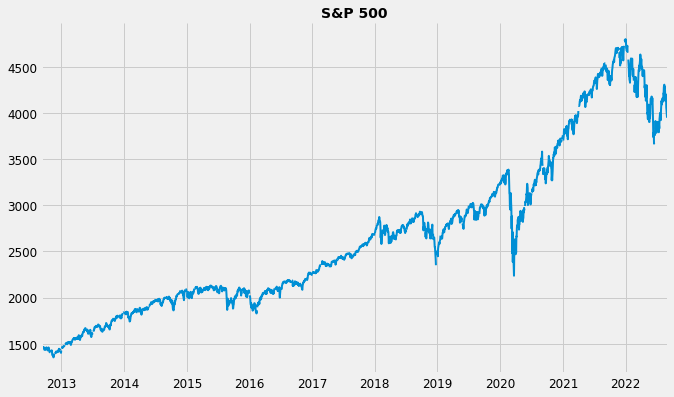

In [5]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot(title = 'S&P 500', lw = 2)

In [6]:
fred.search('unemployment')


,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2022-09-02,2022-09-02,Unemployment Rate,1948-01-01,2022-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-09-02 07:44:03-05:00,92,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2022-09-02,2022-09-02,Unemployment Rate,1948-01-01,2022-08-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-09-02 07:43:04-05:00,54,The unemployment rate represents the number of...
NROU,NROU,2022-09-02,2022-09-02,Noncyclical Rate of Unemployment,1949-01-01,2032-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2022-05-26 13:45:04-05:00,66,"Starting with the July, 2021 report: An Update..."
CCSA,CCSA,2022-09-02,2022-09-02,Continued Claims (Insured Unemployment),1967-01-07,2022-08-20,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2022-09-01 07:33:05-05:00,71,"Continued claims, also referred to as insured ..."
UNEMPLOY,UNEMPLOY,2022-09-02,2022-09-02,Unemployment Level,1948-01-01,2022-08-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2022-09-02 07:44:09-05:00,66,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SOUT718UR,SOUT718UR,2022-09-02,2022-09-02,"Unemployment Rate in South Bend-Mishawaka, IN-...",1990-01-01,2022-07-01,Monthly,M,Percent,%,Smoothed Seasonally Adjusted,SSA,2022-08-31 13:31:34-05:00,1,None
LAUMT184378000000003A,LAUMT184378000000003A,2022-09-02,2022-09-02,"Unemployment Rate in South Bend-Mishawaka, IN-...",1990-01-01,2021-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-04-27 11:11:00-05:00,1,None
LAUMT282714000000003A,LAUMT282714000000003A,2022-09-02,2022-09-02,"Unemployment Rate in Jackson, MS (MSA)",1990-01-01,2021-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-04-27 10:48:23-05:00,1,None


<AxesSubplot:>

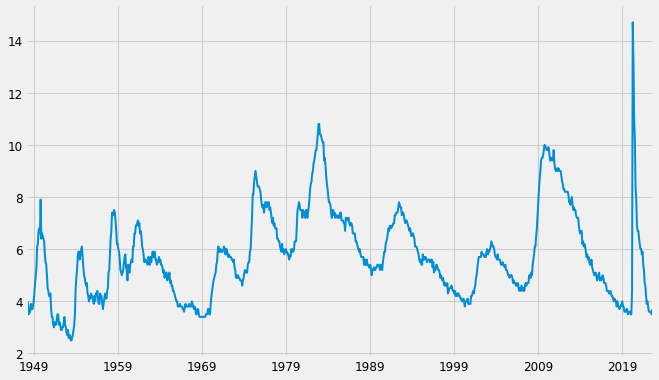

In [7]:
unrate = fred.get_series('UNRATE')
unrate.plot()

In [16]:
unemp_df = fred.search('Unemployment Rate State', filter=('frequency', 'Monthly'))
unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2022-09-02,2022-09-02,Unemployment Rate,1948-01-01,2022-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-09-02 07:44:03-05:00,92,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2022-09-02,2022-09-02,Unemployment Rate,1948-01-01,2022-08-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-09-02 07:43:04-05:00,54,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2022-09-02,2022-09-02,Unemployment Rate - Black or African American,1972-01-01,2022-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-09-02 07:44:07-05:00,66,The series comes from the 'Current Population ...
UNEMPLOY,UNEMPLOY,2022-09-02,2022-09-02,Unemployment Level,1948-01-01,2022-08-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2022-09-02 07:44:09-05:00,66,The series comes from the 'Current Population ...
U6RATE,U6RATE,2022-09-02,2022-09-02,"Total Unemployed, Plus All Persons Marginally ...",1994-01-01,2022-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-09-02 07:44:11-05:00,66,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCPEND1URN,NCPEND1URN,2022-09-02,2022-09-02,"Unemployment Rate in Pender County, NC",1990-01-01,2022-07-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-08-31 10:13:15-05:00,5,These data come from the Current Population Su...
NHGRAF0URN,NHGRAF0URN,2022-09-02,2022-09-02,"Unemployment Rate in Grafton County, NH",1990-01-01,2022-07-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-08-31 10:17:10-05:00,5,These data come from the Current Population Su...
LNU04032217,LNU04032217,2022-09-02,2022-09-02,Unemployment Rate - Professional and Related O...,2000-01-01,2022-08-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-09-02 07:43:55-05:00,5,The series comes from the 'Current Population ...


In [17]:
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2022-09-02,2022-09-02,Unemployment Rate,1948-01-01,2022-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-09-02 07:44:03-05:00,92,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2022-09-02,2022-09-02,Unemployment Rate - Black or African American,1972-01-01,2022-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-09-02 07:44:07-05:00,66,The series comes from the 'Current Population ...
U6RATE,U6RATE,2022-09-02,2022-09-02,"Total Unemployed, Plus All Persons Marginally ...",1994-01-01,2022-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-09-02 07:44:11-05:00,66,The series comes from the 'Current Population ...
LNS14000031,LNS14000031,2022-09-02,2022-09-02,"Unemployment Rate - 20 Yrs. & over, Black or A...",1972-01-01,2022-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-09-02 07:44:15-05:00,56,The series comes from the 'Current Population ...
CAUR,CAUR,2022-09-02,2022-09-02,Unemployment Rate in California,1976-01-01,2022-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-08-22 09:00:05-05:00,55,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USAURAMS,USAURAMS,2022-09-02,2022-09-02,Unemployment Rate in the United States (DISCON...,2007-01-01,2013-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2013-09-03 11:06:07-05:00,2,Bureau of Labor Statistics (BLS) has eliminate...
LNS14000315,LNS14000315,2022-09-02,2022-09-02,Unemployment Rate - Married Women,1955-01-01,2022-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-09-02 07:44:36-05:00,6,To obtain estimates of women worker employment...
LNS13025702,LNS13025702,2022-09-02,2022-09-02,"Of Total Unemployed, Percent Unemployed 15-26 ...",1948-01-01,2022-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-09-02 07:44:52-05:00,5,The series comes from the 'Current Population ...


In [18]:
# unemp_df['title'].str.contains('Unemployment Rate')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]
unemp_df.shape

(95, 15)

In [20]:
all_results = []

for myid in unemp_df.index:
	results = fred.get_series(myid)
	results = results.to_frame(name = myid)
	all_results.append(results)

,UNRATE,LNS14000006,LNS14000031,CAUR,M0892AUSM156SNBR,M0892BUSM156SNBR,FLUR,LNS14000024,TXUR,LNS14000009,LNS14000002,U2RATE,LNS14000003,NYUR,LNS14000001,OHUR,PAUR,LNS14027662,INUR,MIUR,LRUN64TTUSM156S,NCUR,NJUR,TNUR,ALUR,ILUR,WIUR,GAUR,COUR,LNS14027660,KYUR,LNS14032183,MNUR,WAUR,MAUR,IAUR,VAUR,LNS14000012,MOUR,AZUR,WVUR,SCUR,ORUR,UTUR,NMUR,OKUR,LNS14024887,LNS14000018,ARUR,LAUR,LASMT261982000000003,NVUR,NDUR,NEUR,DCUR,LNS14000060,SDUR,LASMT391746000000003,MTUR,MSUR,CTUR,MDUR,KSUR,HIUR,LNS14000028,AKUR,LNS14000036,NHUR,PRUR,LNS14000032,LNS14027659,MEUR,WYUR,IDUR,CNERUR,LNS14027689,CMWRUR,RIUR,DEUR,VTUR,CSOUUR,LNS14024230,CNEWUR,LNS14000048,LNS14000029,LNS14000089,LRHUTTTTUSM156S,LRUNTTTTUSM156S,LRUN24TTUSM156S,LNS14000026,CWSTUR,LNS14000025,LNS14023705,USAURAMS,LNS14000315
1929-04-01,NaN,NaN,NaN,NaN,0.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,NaN,1.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,NaN,2.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,NaN,0.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,3.6,5.9,6.1,4.6,NaN,NaN,3.0,3.4,4.3,4.1,3.5,1.7,3.2,4.5,3.8,4.0,4.8,2.0,2.2,4.3,3.611516,3.4,4.1,3.2,2.8,4.6,2.8,3.1,3.6,3.8,3.9,3.1,2.2,4.1,4.1,3.0,3.0,10.2,3.4,3.2,3.6,3.3,3.7,1.9,5.3,2.7,7.9,15.2,3.2,4.1,4.6,5.0,2.8,1.9,5.8,3.0,2.3,5.5,2.3,4.1,4.4,4.2,2.4,4.1,3.1,4.8,6.9,2.3,6.4,5.0,5.4,3.3,3.3,2.6,4.4,3.1,3.5,3.2,4.5,2.5,3.6,2.7,3.8,3.0,2.8,4.0,3.6,3.6,7.9,3.2,4.1,3.5,0.5,NaN,2.1
2022-05-01,3.6,6.2,5.7,4.3,NaN,NaN,2.9,3.4,4.2,4.3,3.6,1.7,3.2,4.4,3.6,3.9,4.6,2.0,2.2,4.3,3.604682,3.4,3.9,3.3,2.7,4.6,2.9,3.0,3.5,3.8,3.8,2.4,2.0,3.9,3.9,2.7,3.0,10.4,3.1,3.2,3.5,3.3,3.5,2.0,5.1,2.8,7.8,18.3,3.2,4.0,4.6,4.9,2.6,1.9,5.7,3.1,2.3,5.5,2.4,3.9,4.2,4.0,2.3,4.1,3.1,4.6,6.7,2.1,6.2,5.9,5.2,3.2,3.2,2.5,4.2,3.4,3.4,2.9,4.5,2.3,3.5,2.7,3.6,3.0,2.9,3.9,3.6,3.6,7.8,3.4,4.0,3.4,0.5,NaN,2.3
2022-06-01,3.6,5.8,5.3,4.2,NaN,NaN,2.8,3.3,4.1,4.3,3.6,1.6,3.3,4.4,3.6,3.9,4.

In [22]:
unemp_df.tail(10)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
LNS14000089,LNS14000089,2022-09-02,2022-09-02,Unemployment Rate - 25-34 Yrs.,1948-01-01,2022-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-09-02 07:44:37-05:00,9,The series comes from the 'Current Population ...
LRHUTTTTUSM156S,LRHUTTTTUSM156S,2022-09-02,2022-09-02,Harmonized Unemployment Rate: Total: All Perso...,1960-01-01,2022-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-08-11 14:50:22-05:00,8,OECD descriptor ID: LRHUTTTT OECD unit ID: STS...
LRUNTTTTUSM156S,LRUNTTTTUSM156S,2022-09-02,2022-09-02,Unemployment Rate: Aged 15 and Over: All Perso...,1960-01-01,2022-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-08-11 14:50:32-05:00,3,OECD descriptor ID: LRUNTTTT OECD unit ID: STS...
LRUN24TTUSM156S,LRUN24TTUSM156S,2022-09-02,2022-09-02,Unemployment Rate: Aged 15-24: All Persons for...,1960-01-01,2022-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-08-11 14:50:14-05:00,9,OECD descriptor ID: LRUN24TT OECD unit ID: STS...
LNS14000026,LNS14000026,2022-09-02,2022-09-02,"Unemployment Rate - 20 Yrs. & over, Women",1948-01-01,2022-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-09-02 07:44:39-05:00,8,To obtain estimates of women worker employment...
CWSTUR,CWSTUR,2022-09-02,2022-09-02,Unemployment Rate in West Census Region,1976-01-01,2022-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-08-22 08:59:09-05:00,8,None
LNS14000025,LNS14000025,2022-09-02,2022-09-02,"Unemployment Rate - 20 Yrs. & over, Men",1948-01-01,2022-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-09-02 07:44:36-05:00,8,The series comes from the 'Current Population ...
LNS14023705,LNS14023705,2022-09-02,2022-09-02,Unemployment Rate - Job Leavers,1967-01-01,2022-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-09-02 07:44:45-05:00,7,The series comes from the 'Current Population ...
USAURAMS,USAURAMS,2022-09-02,2022-09-02,Unemployment Rate in the United States (DISCON...,2007-01-01,2013-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2013-09-03 11:06:07-05:00,2,Bureau of Labor Statistics (BLS) has eliminate...


In [34]:
all_results = []

for myid in unemp_df.index:
	results = fred.get_series(myid)
	results = results.to_frame(name = myid)
	all_results.append(results)
unemp_results = pd.concat(all_results, axis=1).drop(['UNRATE','LNS14000089', 'LRHUTTTTUSM156S', 'LRUNTTTTUSM156S', 'LRUN24TTUSM156S', 'LNS14000026', 'CWSTUR', 'LNS14000025', 'LNS14023705', 'USAURAMS', 'LNS14000315', 'LNS14000006', 'LNS14000031', 'M0892AUSM156SNBR', 'M0892BUSM156SNBR', 'LNS14000024', 'LNS14000009', 'LNS14000002', 'LNS14000003', 'U2RATE', 'LNS14000001', 'LNS14027662', 'LRUN64TTUSM156S', 'LNS14027660', 'LNS14032183', 'LNS14000012', 'LNS14024887', 'LNS14000018', 'LASMT261982000000003', 'LNS14000060', 'LASMT391746000000003', 'LNS14000028', 'LNS14000036', 'LNS14000032', 'LNS14027659', 'LNS14027689', 'LNS14024230', 'LNS14000048', 'LNS14000029'], axis =1)
unemp_states = unemp_results.copy()# redo this programmatically, function or loop through w/ number of chars >~5 to be excluded

,CAUR,FLUR,TXUR,NYUR,OHUR,PAUR,INUR,MIUR,NCUR,NJUR,TNUR,ALUR,ILUR,WIUR,GAUR,COUR,KYUR,MNUR,WAUR,MAUR,IAUR,VAUR,MOUR,AZUR,WVUR,SCUR,ORUR,UTUR,NMUR,OKUR,ARUR,LAUR,NVUR,NDUR,NEUR,DCUR,SDUR,MTUR,MSUR,CTUR,MDUR,KSUR,HIUR,AKUR,NHUR,PRUR,MEUR,WYUR,IDUR,CNERUR,CMWRUR,RIUR,DEUR,VTUR,CSOUUR,CNEWUR
1929-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,4.6,3.0,4.3,4.5,4.0,4.8,2.2,4.3,3.4,4.1,3.2,2.8,4.6,2.8,3.1,3.6,3.9,2.2,4.1,4.1,3.0,3.0,3.4,3.2,3.6,3.3,3.7,1.9,5.3,2.7,3.2,4.1,5.0,2.8,1.9,5.8,2.3,2.3,4.1,4.4,4.2,2.4,4.1,4.8,2.3,6.4,3.3,3.3,2.6,4.4,3.5,3.2,4.5,2.5,3.6,3.8
2022-05-01,4.3,2.9,4.2,4.4,3.9,4.6,2.2,4.3,3.4,3.9,3.3,2.7,4.6,2.9,3.0,3.5,3.8,2.0,3.9,3.9,2.7,3.0,3.1,3.2,3.5,3.3,3.5,2.0,5.1,2.8,3.2,4.0,4.9,2.6,1.9,5.7,2.3,2.4,3.9,4.2,4.0,2.3,4.1,4.6,2.1,6.2,3.2,3.2,2.5,4.2,3.4,2.9,4.5,2.3,3.5,3.6
2022-06-01,4.2,2.8,4.1,4.4,3.9,4.5,2.4,4.3,3.4,3.9,3.3,2.6,4.5,2.9,2.9,3.4,3.7,1.8,3.8,3.7,2.6,2.8,2.8,3.3,3.6,3.2,3.5,2.0,4.9,2.9,3.2,3.8,4.7,2.5,1.9,5.5,2.3,2.6,3.8,4.0,4.0,2.4,4.2,4.6,2.0,6.1,3.0,3.1,2.5,4.1,3.3,2.7,4.5,2.2,3.4,3.5
2022-07-01,3.9,2.7,4.0,4.4,3.9,4.3,2.6,4.2,3.4,3.7,3.3,2.6,4.4,3.0,2.8,3.3,3.7,1.8,3.7,3.5,2.5,2.7,2.5,3.3,3.7,3.2,3.5,2.0,4.5,3.0,3.3,3.6,4.4,2.3,2.0,5.2,2.3,2.7,3.6,3.7,3.9,2.4,4.1,4.5,2.0,5.9,2.8,3.0,2.6,4.0,3.3,2.7,4.4,2.1,3.4,3.3


In [62]:
unemp_results.dropna(axis = 1)
unemp_states = unemp_states.dropna()

# id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
unemp_states.columns

Index(['California', 'Florida', 'Texas', 'New York', 'Ohio', 'Pennsylvania',
       'Indiana', 'Michigan', 'North Carolina', 'New Jersey', 'Tennessee',
       'Alabama', 'Illinois', 'Wisconsin', 'Georgia', 'Colorado', 'Kentucky',
       'Minnesota', 'Washington', 'Massachusetts', 'Iowa', 'Virginia',
       'Missouri', 'Arizona', 'West Virginia', 'South Carolina', 'Oregon',
       'Utah', 'New Mexico', 'Oklahoma', 'Arkansas', 'Louisiana', 'Nevada',
       'North Dakota', 'Nebraska', 'the District of Columbia', 'South Dakota',
       'Montana', 'Mississippi', 'Connecticut', 'Maryland', 'Kansas', 'Hawaii',
       'Alaska', 'New Hampshire', 'Puerto Rico', 'Maine', 'Wyoming', 'Idaho',
       'Northeast Census Region', 'Midwest Census Region', 'Rhode Island',
       'Delaware', 'Vermont', 'South Census Region',
       'New England Census Division'],
      dtype='object')

In [42]:
# Plot states nemployment rate
px.line(unemp_states)

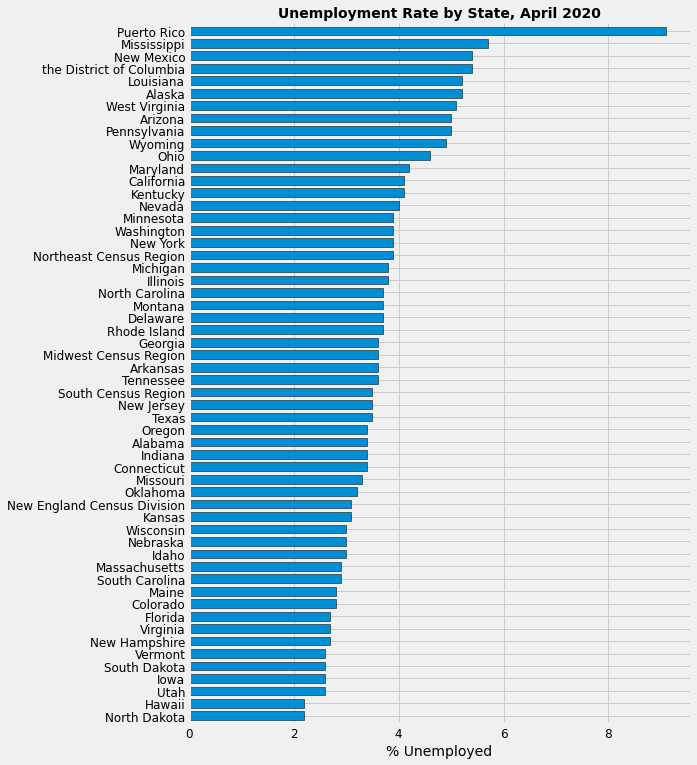

In [68]:
## Pull April 2020 unemployment rate per state
ax = unemp_states.loc[unemp_states.index == '2020-02-01'].T. \
	sort_values('2020-02-01'). \
	plot(kind='barh', figsize = (8, 12), width = 0.7, edgecolor = 'black', \
		 title = 'Unemployment Rate by State, April 2020')
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()


In [77]:
part_df = fred.search('participation rate state', filter = ('frequency', 'Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
part_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CIVPART,CIVPART,2022-09-02,2022-09-02,Labor Force Participation Rate,1948-01-01,2022-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-09-02 07:44:03-05:00,86,The series comes from the 'Current Population ...
LNS11300060,LNS11300060,2022-09-02,2022-09-02,Labor Force Participation Rate - 25-54 Yrs.,1948-01-01,2022-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-09-02 07:44:08-05:00,66,The series comes from the 'Current Population ...
LNS11300002,LNS11300002,2022-09-02,2022-09-02,Labor Force Participation Rate - Women,1948-01-01,2022-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-09-02 07:44:14-05:00,64,To obtain estimates of women worker employment...
LNS11300001,LNS11300001,2022-09-02,2022-09-02,Labor Force Participation Rate - Men,1948-01-01,2022-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-09-02 07:44:15-05:00,56,The series comes from the 'Current Population ...
LNS11324230,LNS11324230,2022-09-02,2022-09-02,Labor Force Participation Rate - 55 Yrs. & over,1948-01-01,2022-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-09-02 07:44:18-05:00,51,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LRACTTFEUSM156S,LRACTTFEUSM156S,2022-09-02,2022-09-02,Activity Rate: Aged 15 and Over: Females for t...,1960-01-01,2022-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-08-11 15:19:53-05:00,1,OECD descriptor ID: LRACTTFE OECD unit ID: STS...
LRINTTMAUSM156S,LRINTTMAUSM156S,2022-09-02,2022-09-02,Inactivity Rate: Aged 15 and Over: Males for t...,1975-01-01,2022-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-08-11 15:19:41-05:00,1,OECD descriptor ID: LRINTTMA OECD unit ID: STS...
LRINTTFEUSM156S,LRINTTFEUSM156S,2022-09-02,2022-09-02,Inactivity Rate: Aged 15 and Over: Females for...,1975-01-01,2022-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-08-11 15:19:42-05:00,1,OECD descriptor ID: LRINTTFE OECD unit ID: STS...


In [80]:
# part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

all_results = []

for myid in part_df.index:
	results = fred.get_series(myid)
	results = results.to_frame(name = myid)
	all_results.append(results)
part_states = pd.concat(all_results, axis=1)
# .drop(['UNRATE','LNS14000089', 'LRHUTTTTUSM156S', 'LRUNTTTTUSM156S', 'LRUN24TTUSM156S', 'LNS14000026', 'CWSTUR', 'LNS14000025', 'LNS14023705', 'USAURAMS', 'LNS14000315', 'LNS14000006', 'LNS14000031', 'M0892AUSM156SNBR', 'M0892BUSM156SNBR', 'LNS14000024', 'LNS14000009', 'LNS14000002', 'LNS14000003', 'U2RATE', 'LNS14000001', 'LNS14027662', 'LRUN64TTUSM156S', 'LNS14027660', 'LNS14032183', 'LNS14000012', 'LNS14024887', 'LNS14000018', 'LASMT261982000000003', 'LNS14000060', 'LASMT391746000000003', 'LNS14000028', 'LNS14000036', 'LNS14000032', 'LNS14027659', 'LNS14027689', 'LNS14024230', 'LNS14000048', 'LNS14000029'], axis =1)

ValueError: Too Many Requests.  Exceeded Rate Limit

In [84]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate ','').to_dict()
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

KeyError: 'Labor Force Participation Rate'

In [82]:
part_states

,Labor Force Participation Rate,Labor Force Participation Rate - 25-54 Yrs.,Labor Force Participation Rate - Women,Labor Force Participation Rate - Men,Labor Force Participation Rate - 55 Yrs. & over,Labor Force Participation Rate - 16-19 Yrs.,Labor Force Participation Rate - 20-24 Yrs.,Labor Force Participation Rate - Black or African American,"Labor Force Participation Rate - Bachelor's Degree and Higher, 25 Yrs. & over",Activity Rate: Aged 25-54: Males for the United States,Minnesota,"Labor Force Participation Rate - High School Graduates, No College, 25 Yrs. & over",California,Alabama,"Labor Force Participation Rate - 20 Yrs. & over, White Men",Wisconsin,Texas,"Labor Force Participation Rate - 20 Yrs. & over, Black or African American Men",Labor Force Participation Rate - White,"Labor Force Participation Rate - 20 Yrs. & over, Black or African American Women",Ohio,Florida,"Labor Force Participation Rate - Less Than a High School Diploma, 25 Yrs. & over",Kentucky,Michigan,Labor Force Participation Rate - Hispanic or Latino,Activity Rate: Aged 15-64: All Persons for the United States,New York,West Virginia,Georgia,Iowa,"Labor Force Participation Rate - 20 Yrs. & over, Women",Activity Rate: Aged 25-54: Females for the United States,Colorado,North Carolina,"Labor Force Participation Rate - 20 Yrs. & over, White Women",Missouri,Tennessee,New Mexico,Pennsylvania,Alaska,Illinois,Mississippi,Utah,Arizona,Virginia,Oklahoma,Maine,"Labor Force Participation Rate - 20 Yrs. & over, Men",New Hampshire,Indiana,Massachusetts,South Carolina,Washington,Activity Rate: Aged 55-64: All Persons for the United States,Oregon,South Dakota,"Labor Force Participation Rate - Some College or Associate Degree, 25 Yrs. & over",Arkansas,Nebraska,Connecticut,Louisiana,Nevada,Kansas,Vermont,Inactivity Rate: Aged 15-64: All Persons for the United States,Maryland,North Dakota,New Jersey,Rhode Island,"Labor Force Participation Rate - 16-19 Yrs., White",Montana,Idaho,"Labor Force Participation Rate - 16-19 Yrs., Black or African American",District Of Columbia,Wyoming,Hawaii,Delaware,Activity Rate: Aged 55-64: Males for the United States,Activity Rate: Aged 15-24: All Persons for the United States,Activity Rate: Aged 15-24: Females for the United States,Activity Rate: Aged 55-64: Females for the United States,Inactivity Rate: Aged 25-54: Males for the United States,Activity Rate: Aged 15-64: Males for the United States,Activity Rate: Aged 25-54: All Persons for the United States,Activity Rate: Aged 15-24: Males for the United States,Inactivity Rate: Aged 55-64: Males for the United States,Inactivity Rate: Aged 25-54: Females for the United States,Inactivity Rate: Aged 15-24: Males for the United States,Inactivity Rate: Aged 15-24: Females for the United States,Activity Rate: Aged 15-74: Females for the United States,Inactivity Rate: Aged 15-74: Females for the United States,Activity Rate: Aged 15-74: Males for the United States,Inactivity Rate: Aged 15-74: Males for the United States,Inactivity Rate: Aged 55-64: Females for the United States,Activity Rate: Aged 15-64: Females for the United States,Inactivity Rate: Aged 15-64: Males for the United States,Inactivity Rate: Aged 15-64: Females for the United States,Activity Rate: Aged 15-74: All Persons for the United States,Inactivity Rate: Aged 15-24: All Persons for the United States,Inactivity Rate: Aged 55-64: All Persons for the United States,Inactivity Rate: Aged 25-54: All Persons for the United States,Inactivity Rate: Aged 15-74: All Persons for the United States,Activity Rate: Aged 15 and Over: Males for the United States,Activity Rate: Aged 15 and Over: Females for the United States,Inactivity Rate: Aged 15 and Over: Males for the United States,Inactivity Rate: Aged 15 and Over: Females for the United States,Activity Rate: Aged 15 and Over: All Persons for the United States,Inactivity Rate: Aged 15 and Over: All Persons for the United States
1948-01-01,58.6,64.2,32.0,86.7,43.0,53.2,64.4,NaN,NaN,NaN,NaN,N